In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define file paths
csv1_path = 'dataset/RAW_recipes.csv'
csv2_path = 'dataset/RAW_interactions.csv'

# Read both CSV files
df1 = pd.read_csv(csv1_path)
df2 = pd.read_csv(csv2_path)

# Drop unwanted columns from both dataframes
columns_to_drop = ['user_id', 'u', 'i', 'tags']
df1.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Drop rows with NaN values from both dataframes
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Ensure 'rating' column in df2 is float
df2['rating'] = df2['rating'].astype(float)

# Calculate average rating and count of ratings for each recipe_id in df2
avg_ratings = df2.groupby('recipe_id')['rating'].agg(['mean', 'count']).reset_index()
avg_ratings.rename(columns={'mean': 'avg_rating', 'count': 'rating_count'}, inplace=True)

# Merge df1 with avg_ratings based on id from df1 and recipe_id from avg_ratings
merged_df = pd.merge(df1, avg_ratings, left_on='id', right_on='recipe_id', how='left')

# Drop recipe_id column from merged_df
merged_df.drop(columns='recipe_id', inplace=True, errors='ignore')

# Drop duplicate rows in merged_df (if any)
merged_df.drop_duplicates(inplace=True)

# Drop rows with NaN values in avg_rating or rating_count
merged_df.dropna(subset=['avg_rating', 'rating_count'], inplace=True)

# Convert rating_count to integer for clarity
merged_df['rating_count'] = merged_df['rating_count'].astype(int)

# Display or further process the merged DataFrame as needed
print(merged_df.shape)  # Display shape of merged DataFrame
#print(merged_df.head())  # Display first few rows of merged DataFrame
print(merged_df.iloc[0])  # Display details of the first row for inspection

(178265, 7)
id                                                         137739
name                   arriba   baked winter squash mexican style
steps           ['make a choice and proceed with recipe', 'dep...
techniques      [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
ingredients     ['winter squash', 'mexican seasoning', 'mixed ...
avg_rating                                                    5.0
rating_count                                                    3
Name: 0, dtype: object


Statistics for rating_count:
Mode: 1
Median: 2.0
Mean: 4.201907272880263

Statistics for avg_rating:
Mode: 5.0
Median: 4.818181818181818
Mean: 4.470420226678707


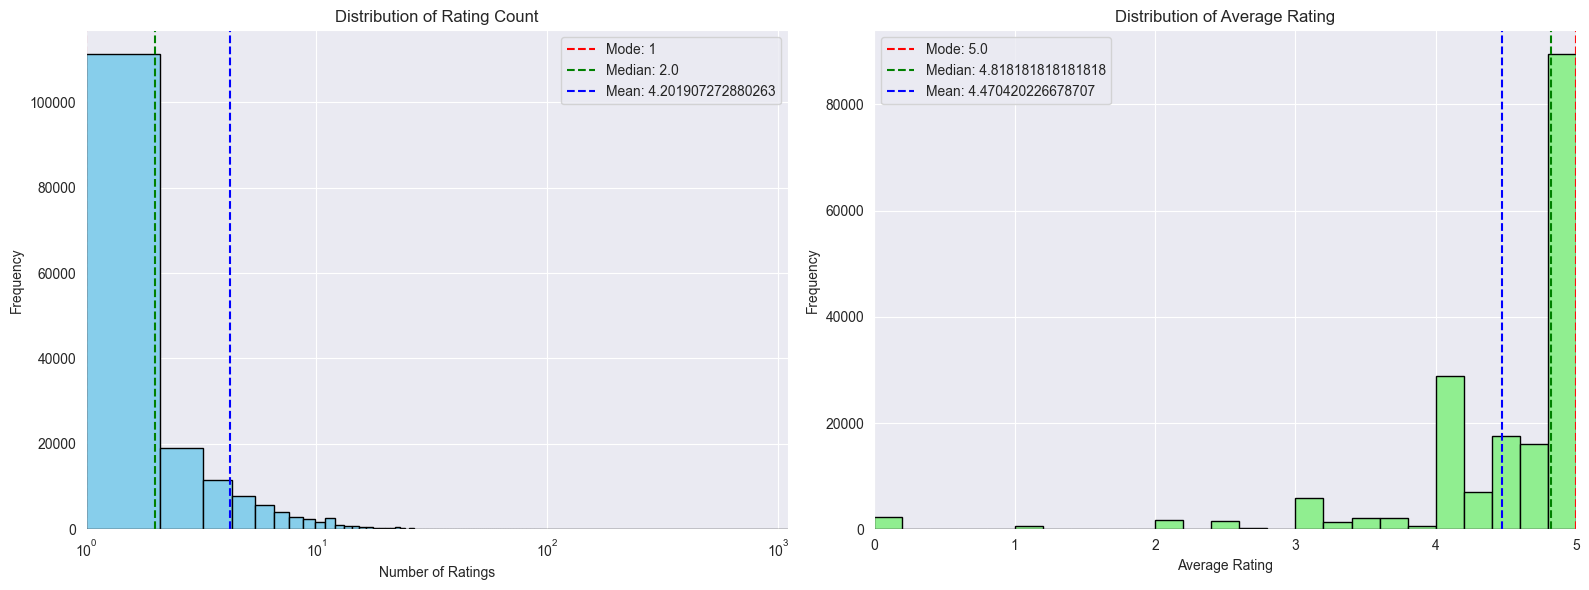

In [4]:

# Calculate statistics: mode, median, mean of rating_count and avg_rating
rating_count_mode = merged_df['rating_count'].mode()[0]
rating_count_median = merged_df['rating_count'].median()
rating_count_mean = merged_df['rating_count'].mean()
rating_count_max = merged_df['rating_count'].max()
rating_count_min = merged_df['rating_count'].min()

avg_rating_mode = merged_df['avg_rating'].mode()[0]
avg_rating_median = merged_df['avg_rating'].median()
avg_rating_mean = merged_df['avg_rating'].mean()
avg_rating_max = merged_df['avg_rating'].max()
avg_rating_min = merged_df['avg_rating'].min()

# Print the results
print(f"Statistics for rating_count:")
print(f"Mode: {rating_count_mode}")
print(f"Median: {rating_count_median}")
print(f"Mean: {rating_count_mean}")
print()
print(f"Statistics for avg_rating:")
print(f"Mode: {avg_rating_mode}")
print(f"Median: {avg_rating_median}")
print(f"Mean: {avg_rating_mean}")




# Plotting
plt.figure(figsize=(16, 6))

# Plot for rating_count (with logarithmic scale)
plt.subplot(1, 2, 1)
plt.hist(merged_df['rating_count'], bins=1000, color='skyblue', edgecolor='black')
plt.axvline(x=rating_count_mode, color='r', linestyle='--', label=f'Mode: {rating_count_mode}')
plt.axvline(x=rating_count_median, color='g', linestyle='--', label=f'Median: {rating_count_median}')
plt.axvline(x=rating_count_mean, color='b', linestyle='--', label=f'Mean: {rating_count_mean}')
plt.title('Distribution of Rating Count')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.legend()
plt.xlim(left=rating_count_min, right=rating_count_max)  # Adjust if necessary

# Plot for avg_rating
plt.subplot(1, 2, 2)
plt.hist(merged_df['avg_rating'], bins=25, color='lightgreen', edgecolor='black')
plt.axvline(x=avg_rating_mode, color='r', linestyle='--', label=f'Mode: {avg_rating_mode}')
plt.axvline(x=avg_rating_median, color='g', linestyle='--', label=f'Median: {avg_rating_median}')
plt.axvline(x=avg_rating_mean, color='b', linestyle='--', label=f'Mean: {avg_rating_mean}')
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(left=avg_rating_min, right=avg_rating_max)

plt.tight_layout()
plt.show()

In [5]:
# Example: Write merged data to a new CSV file
merged_csv_path = 'dataset/RAW_merged.csv'
merged_df.to_csv(merged_csv_path, index=False)

In [9]:
rating_df = merged_df[merged_df['rating_count'] >= 10].copy()
print(rating_df.shape)  # Display shape of merged DataFrame

(13659, 7)


In [10]:
# Sort merged_df by avg_rating and rating_count in descending order to get the best recipes
rating_df.sort_values(by=['avg_rating', 'rating_count'], ascending=False, inplace=True)

# Select the top recipes based on your criteria (e.g., top 100 recipes)
top_recipes = rating_df.head(100000)
print(top_recipes.shape)  # Display shape of top_recipes DataFrame
print(top_recipes[['name', 'avg_rating', 'rating_count']])

(13659, 7)
                                                     name  avg_rating  \
211430                the best creole cajun seasoning mix    5.000000   
35254   caprese salad tomatoes  italian marinated toma...    5.000000   
202447                 substitution for pumpkin pie spice    5.000000   
118004                kittencal s caesar tortellini salad    5.000000   
158547            perfectly chocolate hershey s hot cocoa    5.000000   
...                                                   ...         ...   
132205                                         mayonnaise    2.900000   
188984  slow cooker latin chicken w  sweet potatoes an...    2.900000   
28670                         breakfast tex mex haystacks    2.727273   
150484                             outback bloomin  onion    2.700000   
72792                   donut balls  healthy  yes healthy    2.583333   

        rating_count  
211430            56  
35254             49  
202447            39  
118004            35

In [11]:
# Example: Write merged data to a new CSV file
top_csv_path = 'dataset/RAW_merged_top_smallest.csv'
top_recipes.to_csv(top_csv_path, index=False)